#Load the ness.
#Load the data
#EDA--->checking the data (data preprocessing)
#feature eng.--->rescaling,enconding
#Feature selection-->corr,vif,iv,chi etc
#model building
#model prediction
#model evalution

# Problem Statement
Insurance premiums are often based on various factors that in the end decide the amount that will be covered from the insurance company.
As a data analyst/scientist you are given a set of historical data for an organizations customers and the respective charges that were levied upon the insurance company.

The data gives you the information about the users including their age, sex, bmi, hospitalization history, annual income, etc. Analyze and gather insights fron the data and create a linear regression model that will best predict the insurance charges for a new set of data.

## Dataset Information
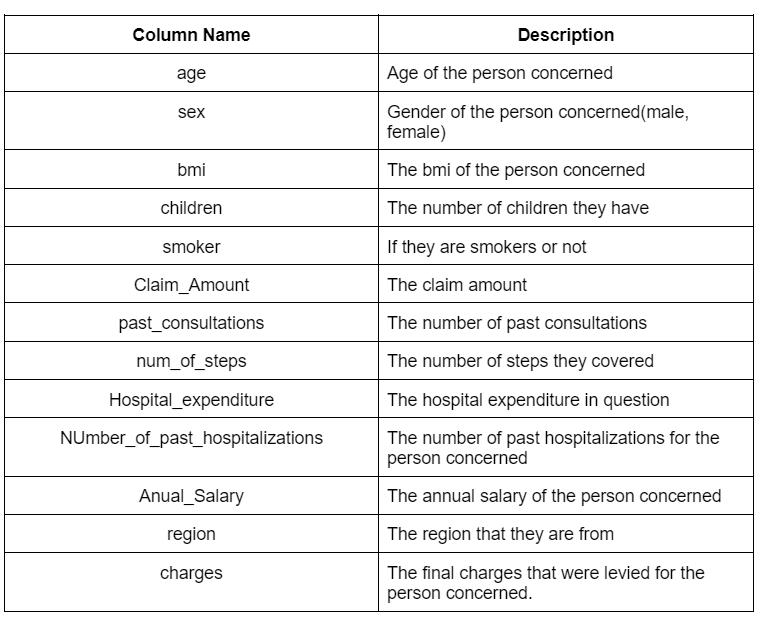

## Importing Initial Python Packages to build an approach towards the business Problem

In [ ]:
import numpy as np   #numerical python
import pandas as pd  #data manipulation
import matplotlib.pyplot as plt  #visul
import seaborn as sns#visul

## Loading the dataset

In [ ]:
insurance = pd.read_csv('new_insurance_data.csv')

In [ ]:
insurance.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [ ]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [ ]:
insurance.shape

(1338, 13)

In [ ]:
insurance.ndim

2

In [ ]:
#data information
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [ ]:
insurance.describe().round()

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
count,1329.0,1335.0,1333.0,1324.0,1332.0,1335.0,1334.0,1336.0,1.332000e+03,1338.0
mean,39.0,31.0,1.0,33361.0,15.0,910005.0,15841792.0,1.0,3.696849e+08,13270.0
std,14.0,6.0,1.0,15617.0,7.0,91886.0,26693048.0,1.0,5.668843e+08,12110.0
min,18.0,16.0,0.0,1920.0,1.0,695430.0,29453.0,0.0,2.747072e+06,1122.0
25%,27.0,26.0,0.0,20769.0,9.0,847200.0,4077633.0,1.0,7.701932e+07,4740.0
50%,39.0,30.0,1.0,33700.0,15.0,914300.0,7490337.0,1.0,1.419361e+08,9382.0
75%,51.0,35.0,2.0,45052.0,20.0,971684.0,10840822.0,1.0,3.243499e+08,16640.0
max,64.0,53.0,5.0,77278.0,40.0,1107872.0,261631699.0,3.0,4.117197e+09,63770.0


In [ ]:
insurance.describe(include='O')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [ ]:
insurance.describe(include='all')

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
count,1329.000000,1338,1335.000000,1333.000000,1338,1324.000000,1332.000000,1.335000e+03,1.334000e+03,1336.000000,1.332000e+03,1338,1338.000000
unique,NaN,2,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
top,NaN,male,NaN,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,southeast,NaN
freq,NaN,676,NaN,NaN,1064,NaN,NaN,NaN,NaN,NaN,NaN,364,NaN
mean,39.310008,NaN,30.665112,1.090773,NaN,33361.327180,15.216216,9.100047e+05,1.584179e+07,1.060629,3.696849e+08,NaN,13270.422265
std,14.034818,NaN,6.101690,1.201856,NaN,15617.288337,7.467723,9.188612e+04,2.669305e+07,0.533583,5.668843e+08,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,1920.136268,1.000000,6.954300e+05,2.945253e+04,0.000000,2.747072e+06,NaN,1121.873900
25%,27.000000,NaN,26.302500,0.000000,NaN,20768.860390,9.000000,8.471995e+05,4.077633e+06,1.000000,7.701932e+07,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,33700.310675,15.000000,9.143000e+05,7.490337e+06,1.000000,1.419361e+08,NaN,9382.033000
75%,51.000000,NaN,34.687500,2.000000,NaN,45052.331957,20.000000,9.716840e+05,1.084082e+07,1.000000,3.243499e+08,NaN,16639.912515


## Checking the distribution of each of the variables in the dataset

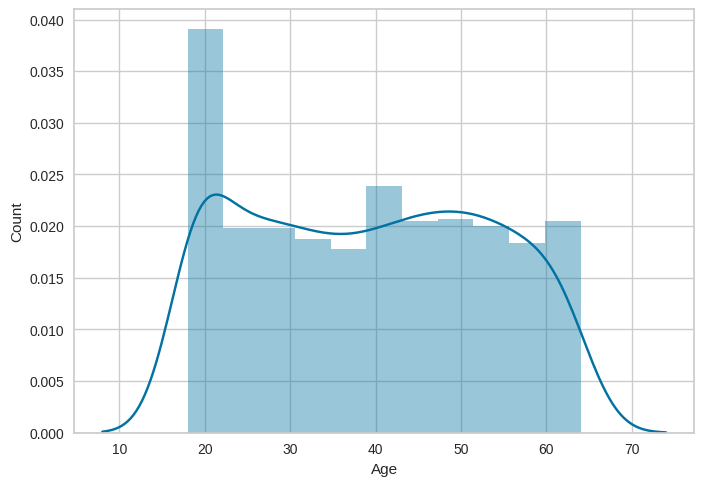

In [ ]:
#distribution of age column
sns.distplot(x=insurance['age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### Interpretations From the plot
The distribution is not normally distributed, and peaks towards 20.


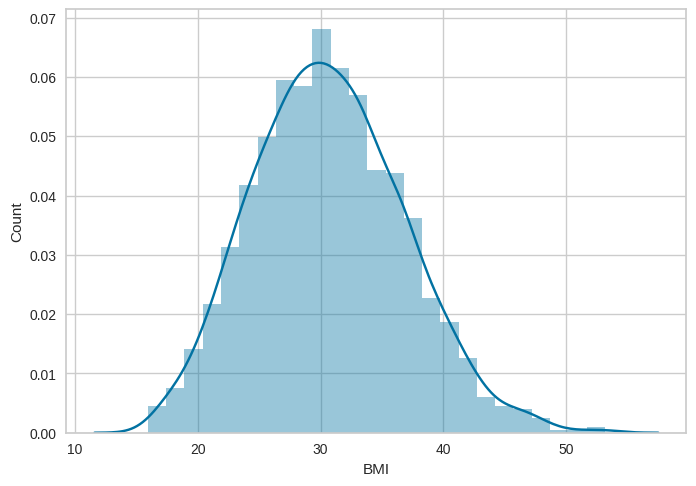

In [ ]:
#distribution of bmi column
sns.distplot(x=insurance['bmi'])
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

### Interpretations from the plot
The distribution can be assumed as a normal distribution that peaks towards 30.

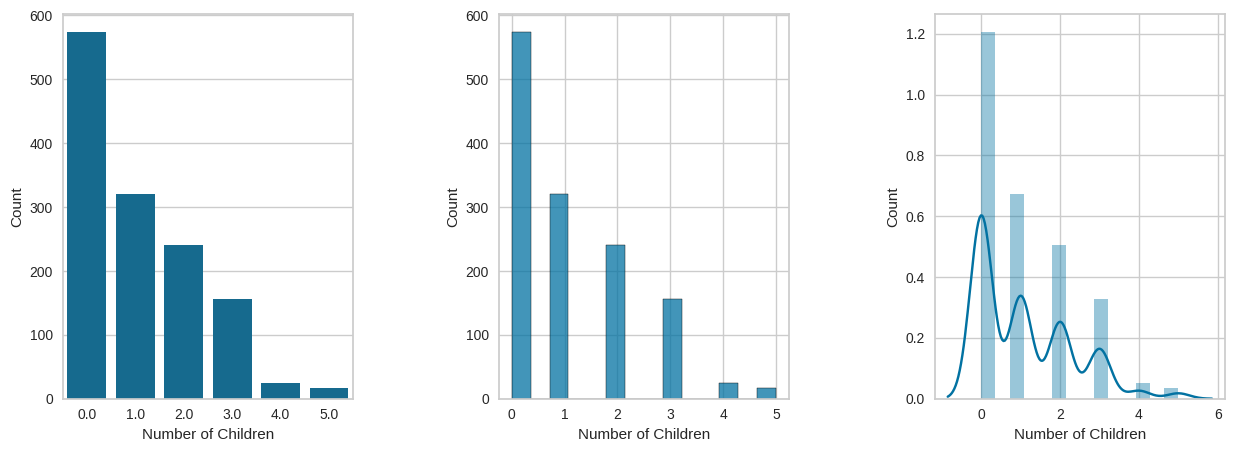

In [ ]:
#distribution of children column
plt.subplots(1,3, figsize=(15,5))

plt.subplot(1,3,1)
sns.countplot(x=insurance['children'])
plt.xlabel('Number of Children')
plt.ylabel('Count')


plt.subplot(1,3,2)
sns.histplot(x=insurance['children'])
plt.xlabel('Number of Children')
plt.ylabel('Count')


plt.subplot(1,3,3)
sns.distplot(x=insurance['children'])
plt.xlabel('Number of Children')
plt.ylabel('Count')

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

### Interpretations from the plot
The distribution is not normally distributed, and we can deduce that most of the customers do not have child in the data.

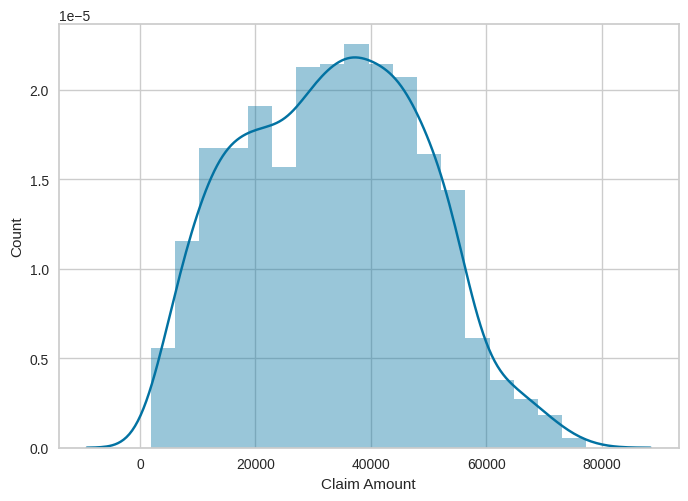

In [ ]:
#distribution of claim amount
sns.distplot(x=insurance['Claim_Amount'])
plt.xlabel('Claim Amount')
plt.ylabel('Count')
plt.show()

### Interpretations from the plot
The distribution is right skewed - majority of the claim amount falls unders the lower ranges of the entire data.

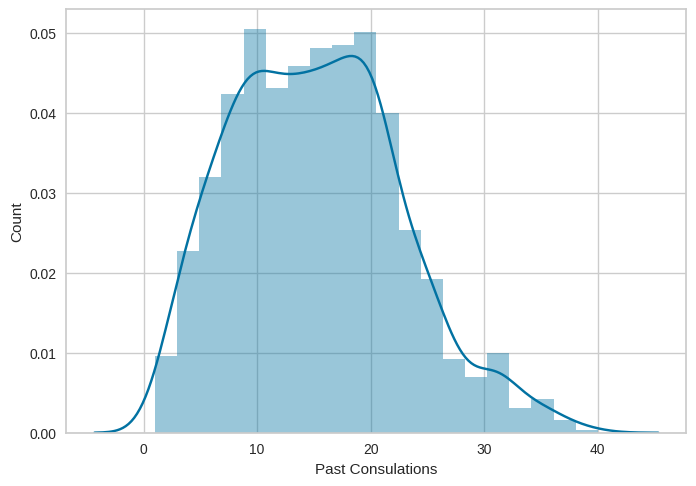

In [ ]:
#distribution of past consultations
sns.distplot(x=insurance['past_consultations'])
plt.xlabel('Past Consulations')
plt.ylabel('Count')
plt.show()

### Interpretations from the plot
The past consultations is right skewed, most of the consultations falls under 25.

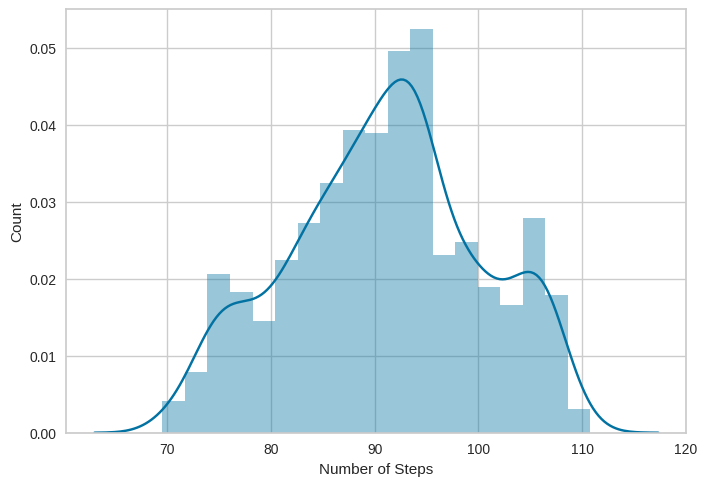

In [ ]:
#distribution of number of steps column
inss = insurance.copy()
inss['num_of_steps'] = inss['num_of_steps'].div(10000).round(2)
sns.distplot(x=inss['num_of_steps'])
plt.xlabel('Number of Steps')
plt.ylabel('Count')
plt.show()

### Interpretations from the plot
The distribution can roughly be assumed as a normal distribution, but the plot is left skewed.

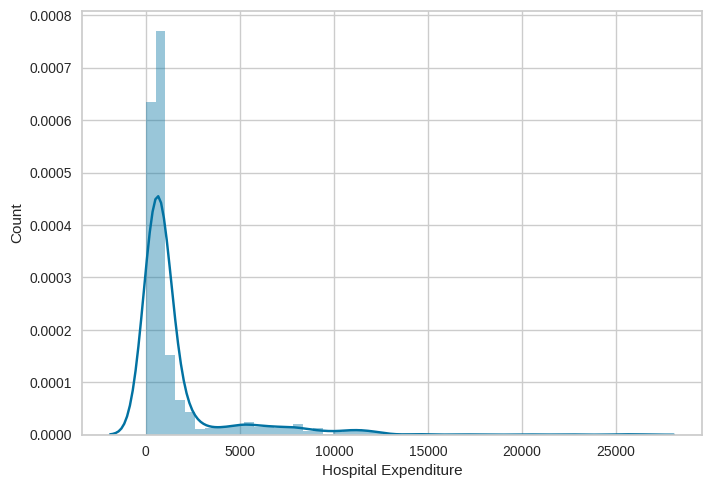

In [ ]:
#distribution of hospital expenditure
inss['Hospital_expenditure'] = inss['Hospital_expenditure'].div(10000).round(2)
sns.distplot(x=inss['Hospital_expenditure'])
plt.xlabel('Hospital Expenditure')
plt.ylabel('Count')
plt.show()

### Interpretations from the plot
the distribution is right skewed for the hospital Expenditure

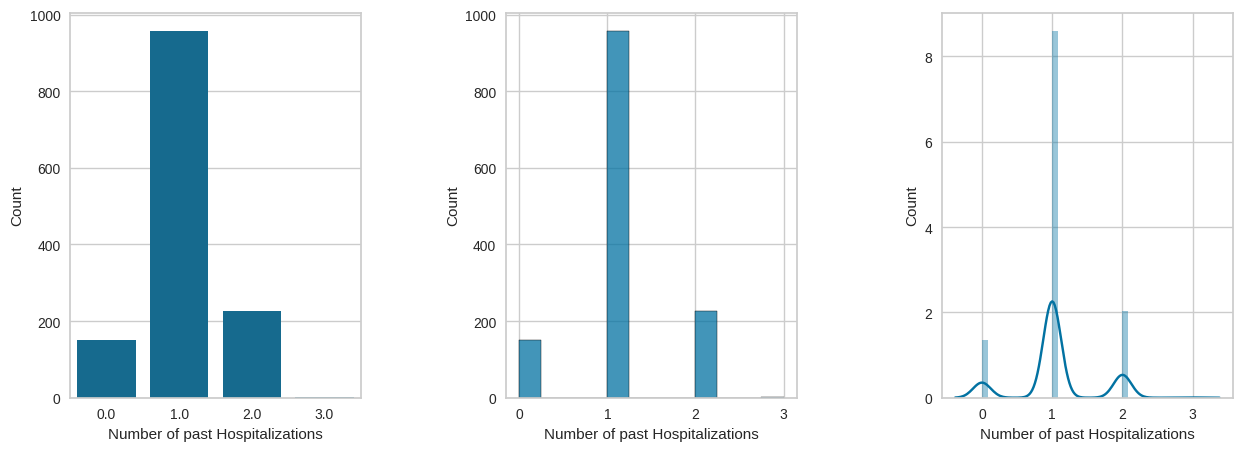

In [ ]:
#distribution of number of past hospitalizations
plt.subplots(1,3, figsize=(15,5))
plt.subplot(1,3,1)
sns.countplot(x=insurance['NUmber_of_past_hospitalizations'])
plt.xlabel('Number of past Hospitalizations')
plt.ylabel('Count')


plt.subplot(1,3,2)
sns.histplot(x=insurance['NUmber_of_past_hospitalizations'])
plt.xlabel('Number of past Hospitalizations')
plt.ylabel('Count')


plt.subplot(1,3,3)
sns.distplot(x=insurance['NUmber_of_past_hospitalizations'])
plt.xlabel('Number of past Hospitalizations')
plt.ylabel('Count')

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

### Interpretations from the plot
The plot shows the customers with 1.0 past hostpitalizations as the highest in the distribution followed by 2.0, 0.0, and 3.0 hospitalizations

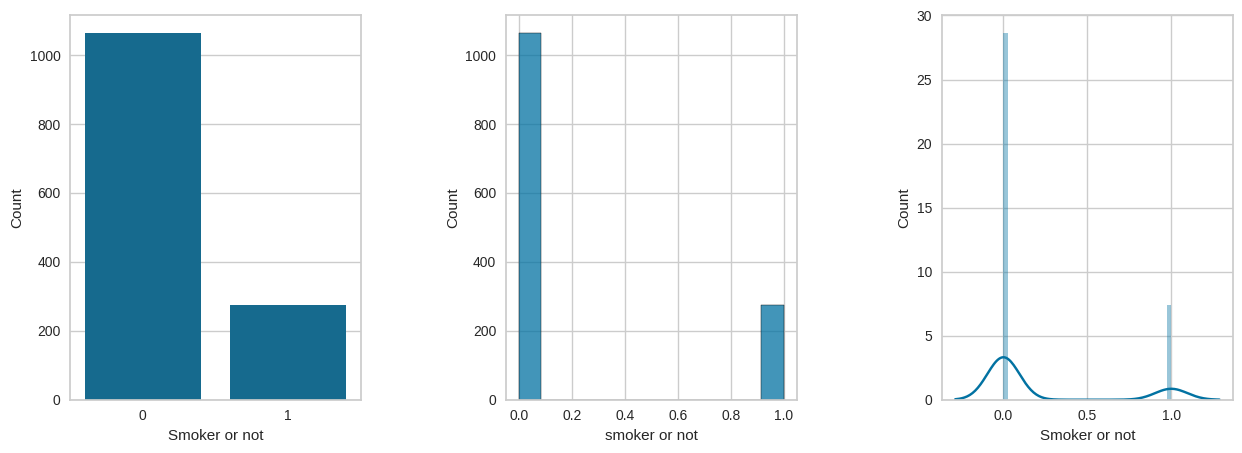

In [ ]:
#distribution of smokers column
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
insurance['smoker'] = le.fit_transform(insurance['smoker'])
insurance['smoker'] = insurance['smoker'].astype(int)

plt.subplots(1,3, figsize=(15,5))
plt.subplot(1,3,1)
sns.countplot(x=insurance['smoker'])
plt.xlabel('Smoker or not')
plt.ylabel('Count')


plt.subplot(1,3,2)
sns.histplot(x=insurance['smoker'])
plt.xlabel('smoker or not')
plt.ylabel('Count')


plt.subplot(1,3,3)
sns.distplot(x=insurance['smoker'])
plt.xlabel('Smoker or not')
plt.ylabel('Count')

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

### Interpretations from the plot
Majority of the distribution shows the presence of non smokers.

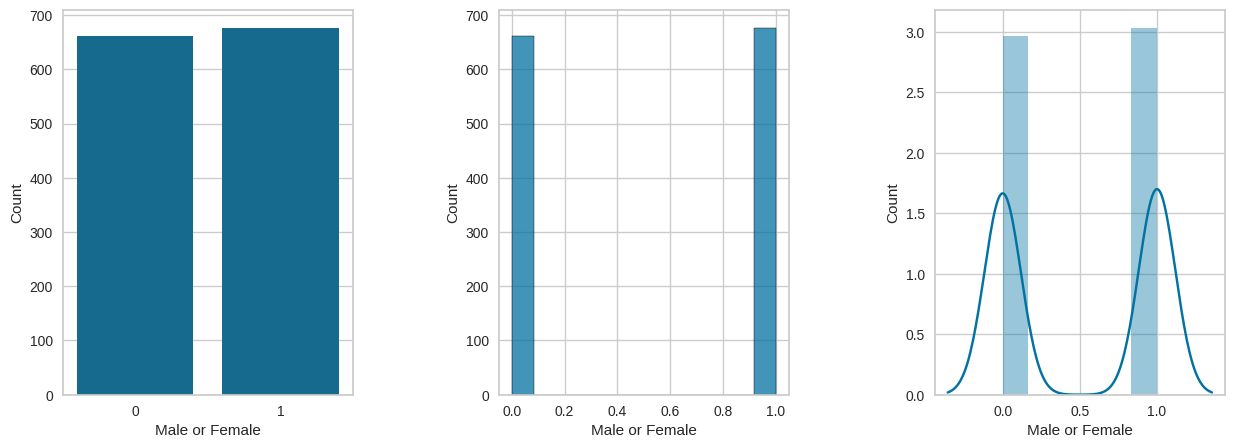

In [ ]:
#distribution of the sex column

insurance['sex'] = le.fit_transform(insurance['sex'])
insurance['sex'] = insurance['sex'].astype(int)

plt.subplots(1,3, figsize=(15,5))
plt.subplot(1,3,1)
sns.countplot(x=insurance['sex'])
plt.xlabel('Male or Female')
plt.ylabel('Count')


plt.subplot(1,3,2)
sns.histplot(x=insurance['sex'])
plt.xlabel('Male or Female')
plt.ylabel('Count')


plt.subplot(1,3,3)
sns.distplot(x=insurance['sex'])
plt.xlabel('Male or Female')
plt.ylabel('Count')

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

### Interpretations from the plot
The gender column shows the presence of males slighly higher than the female customers.

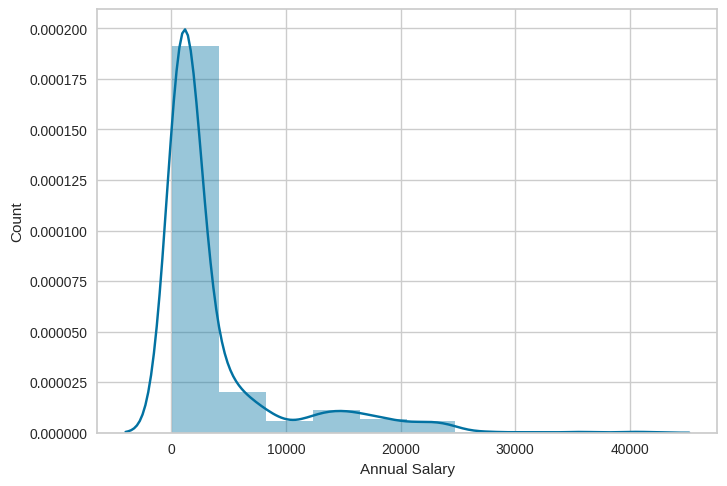

In [ ]:
#distribution of annual salary
ins_dum = insurance.copy()
ins_dum['Anual_Salary'] = ins_dum['Anual_Salary'].div(100000).round(2)
sns.distplot(x=ins_dum['Anual_Salary'], bins=10)
plt.xlabel('Annual Salary')
plt.ylabel('Count')
plt.show()

### Interpretations from the plot
The annual salary distribution is right skewed.

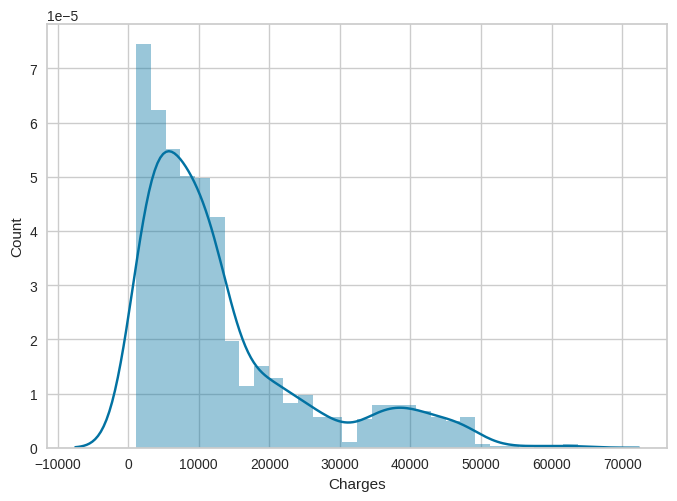

In [ ]:
#distribution of charges column
sns.distplot(x=insurance['charges'])
plt.xlabel('Charges')
plt.ylabel('Count')
plt.show()

### Interpretations from the plot
The charges column is also right skewed.

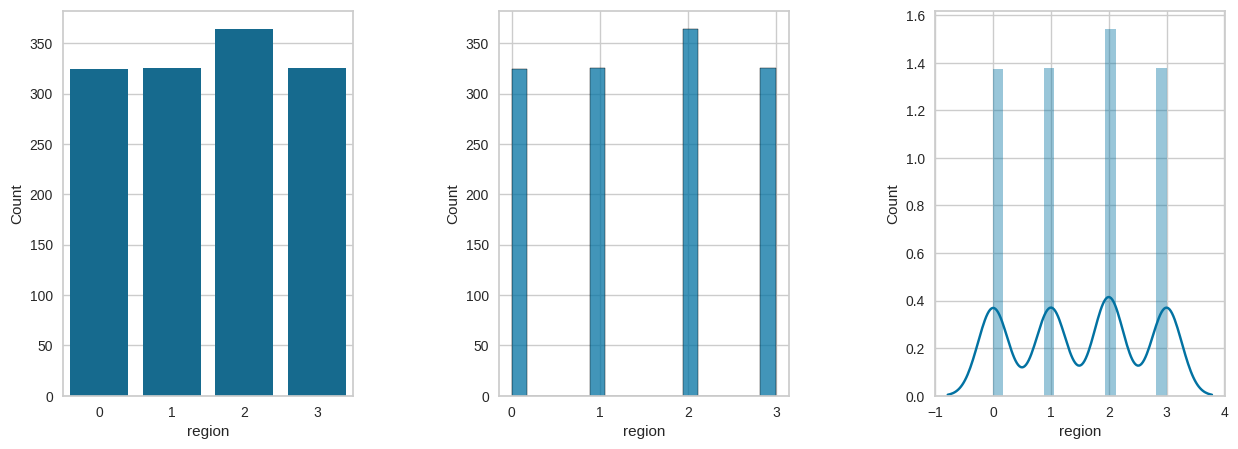

In [ ]:
#distribution of reagions column
insurance['region'] = le.fit_transform(insurance['region'])
insurance['region'] = insurance['region'].astype(int)

plt.subplots(1,3, figsize=(15,5))
plt.subplot(1,3,1)
sns.countplot(x=insurance['region'])
plt.xlabel('region')
plt.ylabel('Count')


plt.subplot(1,3,2)
sns.histplot(x=insurance['region'])
plt.xlabel('region')
plt.ylabel('Count')


plt.subplot(1,3,3)
sns.distplot(x=insurance['region'])
plt.xlabel('region')
plt.ylabel('Count')

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

### Interpretations from the plot
The region column shows the data distributed equally in the entire population.

## Measure of Peakedness and Outlier Analysis using Boxplots

<Axes: ylabel='age'>

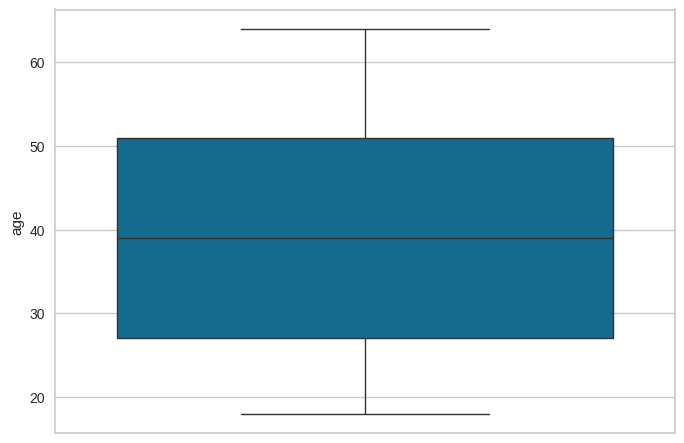

In [ ]:
sns.boxplot(insurance['age'])

<Axes: xlabel='bmi'>

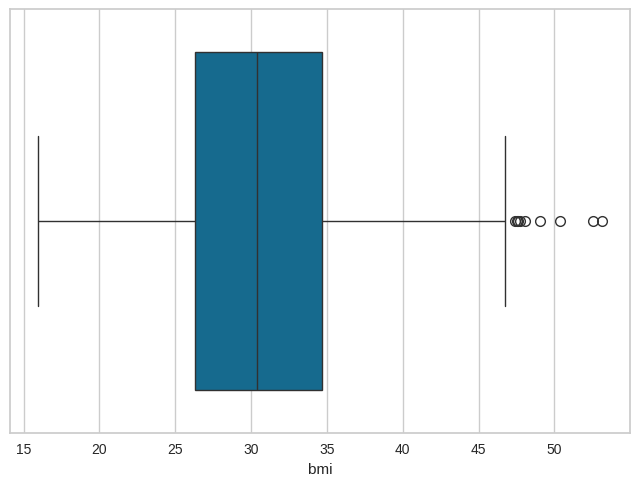

In [ ]:
sns.boxplot(x=insurance['bmi'])

<Axes: xlabel='children'>

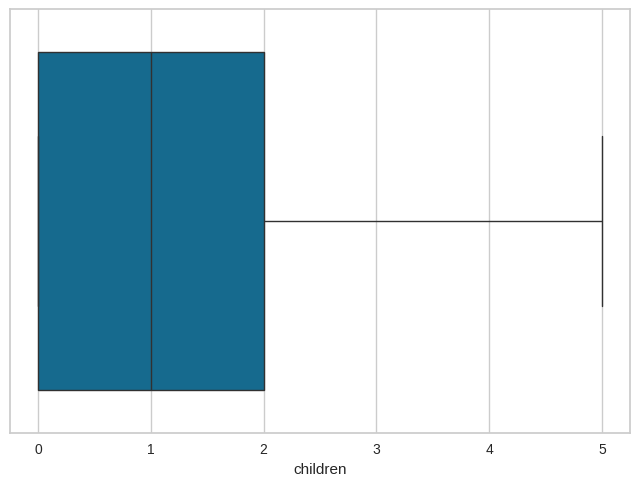

In [ ]:
sns.boxplot(x=insurance['children'])

<Axes: xlabel='Claim_Amount'>

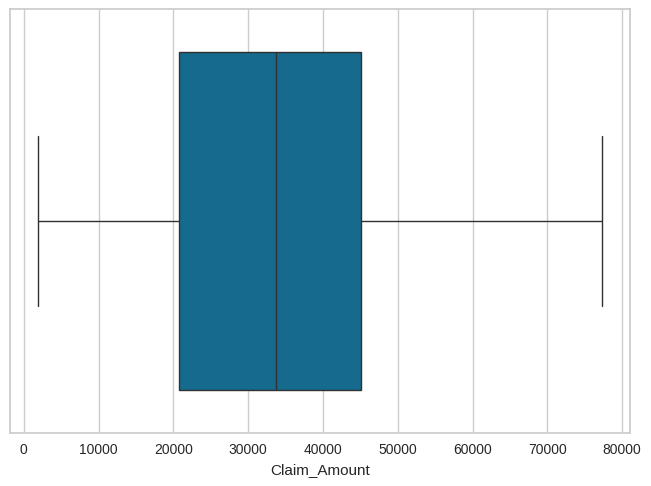

In [ ]:
sns.boxplot(x=insurance['Claim_Amount'])

<Axes: xlabel='past_consultations'>

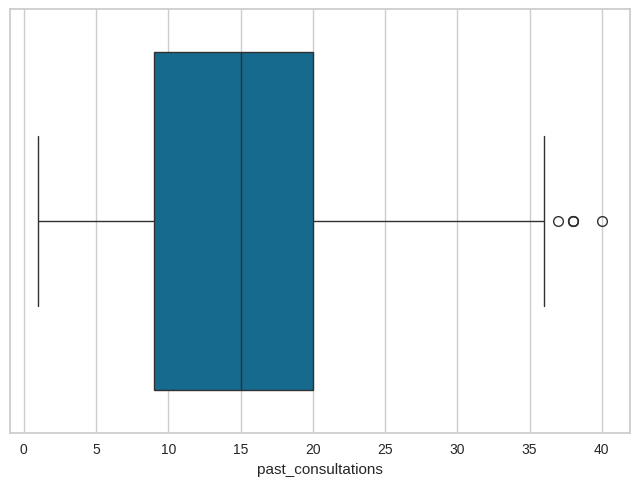

In [ ]:
sns.boxplot(x=insurance['past_consultations'])

<Axes: xlabel='num_of_steps'>

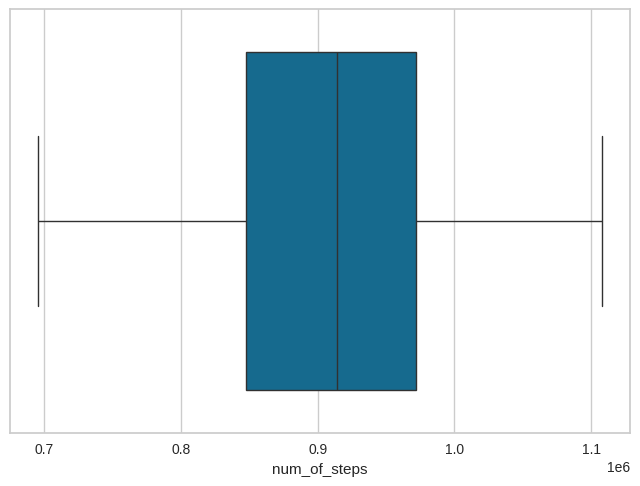

In [ ]:
sns.boxplot(x=insurance['num_of_steps'])

<Axes: xlabel='Hospital_expenditure'>

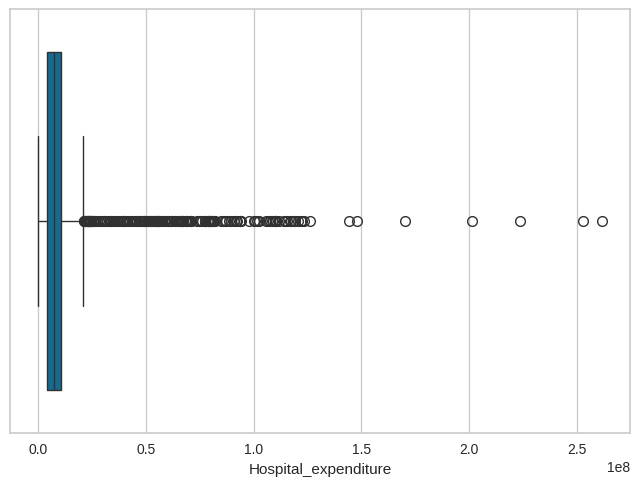

In [ ]:
sns.boxplot(x=insurance['Hospital_expenditure'])

<Axes: xlabel='Anual_Salary'>

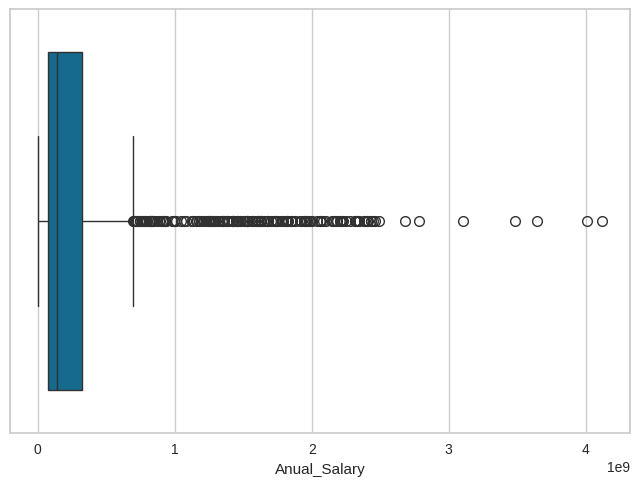

In [ ]:
sns.boxplot(x=insurance['Anual_Salary'])

<Axes: xlabel='region'>

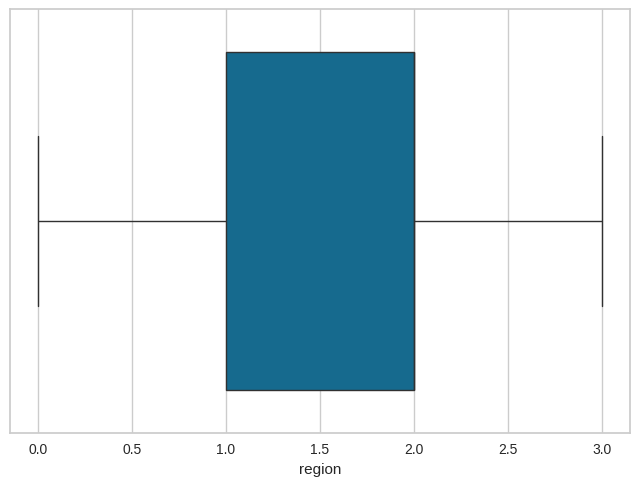

In [ ]:
sns.boxplot(x=insurance['region'])

### Interpretations from the plot

<Axes: xlabel='charges'>

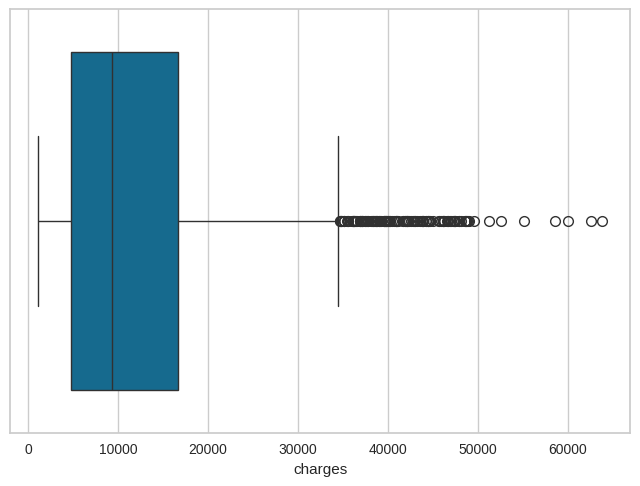

In [ ]:
sns.boxplot(x=insurance['charges'])

### Interpretations from the plots
There is a presence of outliers in the columns 'charges', 'annual_salary', 'hospital_expenditure', 'past_consultations', 'bmi', etc.
1. We will not treat the outliers, since the target variable also consists of outliers which is driven from the other independent variables.

## Understanding the relationship between the dependent and independent variables using a pairplot

<Figure size 1000x500 with 0 Axes>

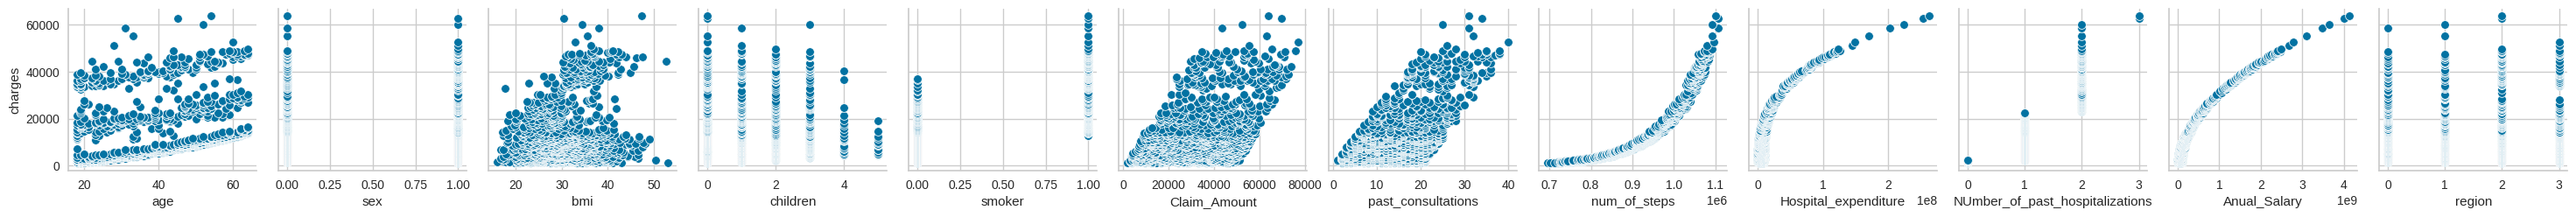

In [ ]:
plt.figure(figsize=(10,5))
sns.pairplot(data=insurance, y_vars=['charges'], x_vars=['age',
                                                         'sex',
                                                         'bmi',
                                                         'children',
                                                         'smoker',
                                                         'Claim_Amount',
                                                         'past_consultations',
                                                         'num_of_steps',
                                                         'Hospital_expenditure',
                                                         'NUmber_of_past_hospitalizations',
                                                         'Anual_Salary',
                                                         'region'])

### Interpretations from the scatter plots
1. Several of the features shows a positive linear relationship with the target variable. These features will be further analyzed w.r.t the correlation to reach a conclusion for their usability in the linear regression model.

## Data Imputation

In [ ]:
insurance.isna().sum()

,0
age,9
sex,0
bmi,3
children,5
smoker,0
Claim_Amount,14
past_consultations,6
num_of_steps,3
Hospital_expenditure,4
NUmber_of_past_hospitalizations,2


In [ ]:
1+2+0+3+4+5+0+6+0

21

In [ ]:
21/9

2.3333333333333335

In [ ]:
21/6

3.5

### Approach for data imputation in the insurance data.
1. We have replaced the null values with the mean in columns where it showed close to a normal distribution i.e age, bmi, claim_amount, past_consultations, num_of_steps.
2. For the distributions that showed a skewed distribution, we have replaced the null values with the median of the column.

In [ ]:
insurance['age'] = insurance['age'].fillna(insurance['age'].median())
insurance['bmi'] = insurance['bmi'].fillna(insurance['bmi'].median())
insurance['children'] = insurance['children'].fillna(insurance['children'].median())
insurance['Claim_Amount'] = insurance['Claim_Amount'].fillna(insurance['Claim_Amount'].median())
insurance['past_consultations'] = insurance['past_consultations'].fillna(insurance['past_consultations'].median())
insurance['num_of_steps'] = insurance['num_of_steps'].fillna(insurance['num_of_steps'].median())
insurance['Hospital_expenditure'] = insurance['Hospital_expenditure'].fillna(insurance['Hospital_expenditure'].median())
insurance['NUmber_of_past_hospitalizations'] = insurance['NUmber_of_past_hospitalizations'].fillna(insurance['NUmber_of_past_hospitalizations'].median())
insurance['Anual_Salary'] = insurance['Anual_Salary'].fillna(insurance['Anual_Salary'].median())

In [ ]:
insurance.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
Claim_Amount,0
past_consultations,0
num_of_steps,0
Hospital_expenditure,0
NUmber_of_past_hospitalizations,0


In [ ]:
insurance.shape

(1338, 13)

## Feature Selection for Data Modeling

In [ ]:
correlation = insurance.corr()
correlation

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
age,1.000000,-0.019154,0.112174,0.041710,-0.028792,0.122873,0.168479,0.513066,0.137208,0.359637,0.163478,0.004623,0.293735
sex,-0.019154,1.000000,0.045138,0.018533,0.076185,-0.003821,0.050274,0.010445,0.069940,0.000214,0.072702,0.004588,0.057292
bmi,0.112174,0.045138,1.000000,0.007790,0.003659,0.093447,0.130701,0.135994,0.256924,0.137115,0.241550,0.158218,0.198745
children,0.041710,0.018533,0.007790,1.000000,0.009608,0.041607,0.054806,0.163478,0.025315,0.185546,0.041260,0.015011,0.070877
smoker,-0.028792,0.076185,0.003659,0.009608,1.000000,0.334410,0.502794,0.665656,0.662698,0.588682,0.739676,-0.002181,0.787251
Claim_Amount,0.122873,-0.003821,0.093447,0.041607,0.334410,1.000000,0.271526,0.398285,0.369988,0.379923,0.404026,0.009098,0.435671
past_consultations,0.168479,0.050274,0.130701,0.054806,0.502794,0.271526,1.000000,0.559692,0.542150,0.500145,0.589292,-0.001864,0.627598
num_of_steps,0.513066,0.010445,0.135994,0.163478,0.665656,0.398285,0.559692,1.000000,0.624790,0.844983,0.733622,-0.041938,0.889753
Hospital_expenditure,0.137208,0.069940,0.256924,0.025315,0.662698,0.369988,0.542150,0.624790,1.000000,0.651827,0.957189,0.029446,0.871796
NUmber_of_past_hospitalizations,0.359637,0.000214,0.137115,0.185546,0.588682,0.379923,0.500145,0.844983,0.651827,1.000000,0.735802,-0.031450,0.820682


### Inferences
There is a strong to moderate correlation with the charges column with the following columns:
1. smoker
2. Claim_Amount
3. past_consultations
4. num_of_steps
5. Hospital_expenditure
6. NUmber_of_past_hospitalizations
7. Anual_Salary

The column 'age', 'sex', 'region', 'children', 'sex' shows no considerable correlation with the charges column, so we will not be considering these features for the initial model.


<Axes: >

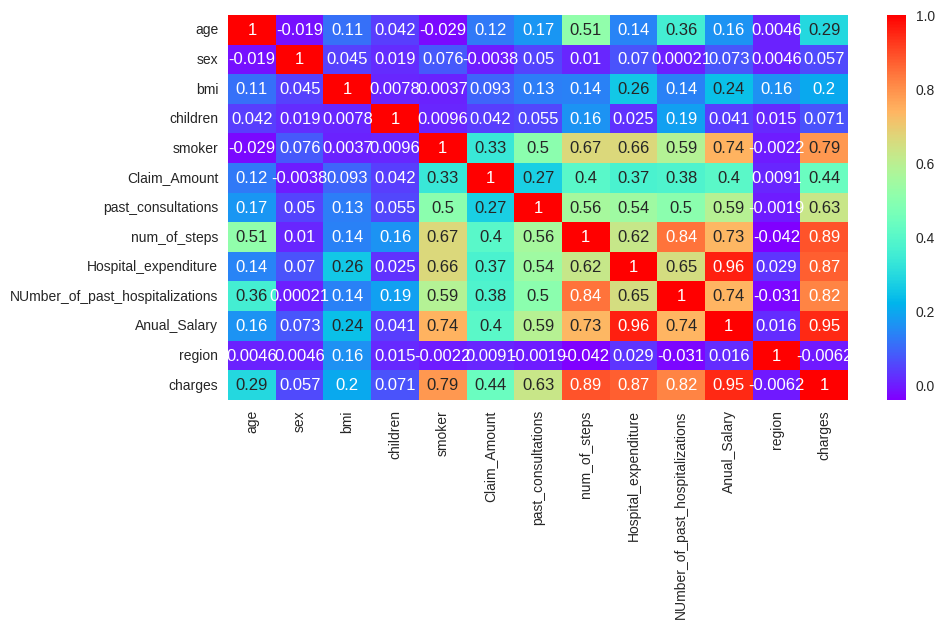

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(correlation,annot=True,cmap='rainbow')

### The correlation heatmap shows the columns that will be most useful for the modeling. The sex, children, and region column shows no considerable correlation.

In [ ]:
import pandas as pd

In [ ]:
#!pip install sweetviz  #sweet visualization

In [ ]:
#import sweetviz as sv

In [ ]:
#report = sv.analyze(insurance)
#report.show_html('harsh_report3.html')

## Data Preprocessing Before Model Training

In [ ]:
from sklearn.model_selection import train_test_split
#splitting the data for model 1
X = insurance.drop(['charges', 'age', 'sex', 'bmi', 'children', 'region'], axis=1)
y = insurance.iloc[:,-1]
#or
#y=insurance['charges']
#splitting the data for model 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#or
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)


In [ ]:
X_train

,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary
560,0,29622.26103,6.0,886052.0,7.579867e+06,1.0,1.589946e+08
1285,1,66824.70947,23.0,1063413.0,8.042196e+07,2.0,1.919607e+09
1142,0,36320.75384,16.0,1001618.0,1.772151e+07,2.0,7.139574e+08
969,0,24827.43078,8.0,962113.0,1.214312e+07,1.0,2.928227e+08
486,0,47348.03370,10.0,888358.0,6.034962e+06,1.0,5.093163e+07
...,...,...,...,...,...,...,...
1095,0,47554.34106,19.0,1007896.0,1.132722e+07,1.0,5.662888e+08
1130,0,63672.07916,14.0,1000863.0,2.295519e+07,2.0,6.472972e+08
1294,1,42578.49702,24.0,1061168.0,9.188836e+07,2.0,2.038383e+09
860,0,27369.02461,22.0,943007.0,3.634140e+06,1.0,1.877743e+08


### Standardizing the features
Normalizing the features so that the samples will have the same mean and standard deviation.

In [ ]:
#feature scaling using the standardscalar
from sklearn.preprocessing import StandardScaler
#scaling the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[-0.50874702, -0.2457309 , -1.23338465, ..., -0.29745518,
        -0.10122056, -0.36540273],
       [ 1.96561348,  2.14271388,  1.08072229, ...,  2.44746197,
         1.76612428,  2.78222091],
       [-0.50874702,  0.18432091,  0.12785473, ...,  0.08471359,
         1.76612428,  0.62675985],
       ...,
       [ 1.96561348,  0.58607603,  1.21684623, ...,  2.87955205,
         1.76612428,  2.99456786],
       [-0.50874702, -0.39039156,  0.94459835, ..., -0.44614248,
        -0.10122056, -0.31395035],
       [-0.50874702,  0.25267611,  1.4890941 , ...,  0.01197612,
         1.76612428,  0.57733069]])

In [ ]:
y_train_arr = y_train.values
y_train = y_train_arr.reshape((-1,1))

In [ ]:
y_train

array([[ 7731.85785],
       [42983.4585 ],
       [25656.57526],
       ...,
       [44260.7499 ],
       [12235.8392 ],
       [24476.47851]])

In [ ]:
y_train = sc.fit_transform(y_train)

## Model Building

In [ ]:
from sklearn.linear_model import LinearRegression

model_uno = LinearRegression()
#fitting the model
model_uno.fit(X_train, y_train)

LinearRegression()

### Making predictions
1. We are making predictions on the test set of each of the  models.

In [ ]:
#predictions - Model
predictions = model_uno.predict(X_test)
predictions

array([[-0.2033096 ],
       [-0.14991095],
       [-0.10003489],
       [ 2.52416396],
       [-0.72651123],
       [ 0.28140084],
       [-0.10784167],
       [-0.16384192],
       [ 2.45137703],
       [-0.25431616],
       [-0.23335245],
       [-0.33427696],
       [-1.11200717],
       [-0.66630212],
       [-0.11532446],
       [-0.06416105],
       [-0.32645405],
       [-0.31397044],
       [-0.40903587],
       [-0.04339337],
       [-0.48180088],
       [-0.38732475],
       [-0.44147678],
       [-0.93796309],
       [ 0.8446412 ],
       [-0.34955232],
       [-0.07784096],
       [-0.48930762],
       [-0.69675476],
       [-0.09115871],
       [ 2.21815645],
       [-0.04672852],
       [-0.20193381],
       [ 0.97018857],
       [ 0.61984706],
       [-0.27951378],
       [-0.58443072],
       [ 2.30241614],
       [ 1.1510947 ],
       [-0.99892482],
       [-1.04847781],
       [-0.47403686],
       [ 0.04372596],
       [ 0.37893924],
       [-0.64815674],
       [-0

In [ ]:
predictions = sc.inverse_transform(predictions)
predictions

array([[10732.07566953],
       [11370.96487632],
       [11967.70810349],
       [43364.98815852],
       [ 4472.21923656],
       [16531.40356   ],
       [11874.30362148],
       [11204.28750411],
       [42494.12747779],
       [10121.80664364],
       [10372.6274022 ],
       [ 9165.11406496],
       [ -140.0547252 ],
       [ 5192.59234781],
       [11784.77570049],
       [12396.92133652],
       [ 9258.71138349],
       [ 9408.07181086],
       [ 8270.65959515],
       [12645.39660548],
       [ 7400.06112268],
       [ 8530.42268061],
       [ 7882.51970486],
       [ 1942.29917757],
       [23270.30416599],
       [ 8982.35171367],
       [12233.24781349],
       [ 7310.24657333],
       [ 4828.24116204],
       [12073.90724746],
       [39703.75504871],
       [12605.49315114],
       [10748.53639784],
       [24772.41822268],
       [20580.75015686],
       [ 9820.32920275],
       [ 6172.14440714],
       [40711.8818291 ],
       [26936.87328362],
       [ 1212.9213647 ],


In [ ]:
y_test

,charges
764,10928.84900
887,12648.70340
890,12797.20962
1293,44202.65360
259,3925.75820
...,...
109,2154.36100
575,8062.76400
535,7371.77200
543,7448.40395


## Model Evaluation

### Approach for the evaluation
1. We are calculating the r2 score


In [ ]:
from sklearn.metrics import *

r2_score(y_test, predictions)


0.9710072494452009

In [ ]:
#R2=CLOSE TO 1 IS GOOD  #-inf-1
#good range is closed to 1
#rmse=focus on big mistake
#0 to inf
#close to 0 is good
#MEA=trating all mistake equally
#0 to inf
#good range is close to 0


In [ ]:
!pip install pycaret

In [ ]:
import pandas as pd
from pycaret.regression import *
#from pycaret.classification import *
# Load your dataset
data=pd.read_csv('/content/new_insurance_data - new_insurance_data_train.csv.csv')

In [ ]:
data

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,29.0,female,21.850,0.0,yes,44232.52272,9.0,963340.0,8.443194e+06,1.0,3.368018e+08,northeast,16115.30450
995,29.0,male,22.895,0.0,yes,12674.25209,20.0,954474.0,1.131598e+07,1.0,3.091118e+08,northeast,16138.76205
996,20.0,male,27.300,0.0,yes,32076.78940,21.0,979726.0,1.012317e+07,1.0,3.500268e+08,southwest,16232.84700
997,19.0,male,27.700,0.0,yes,21877.72685,10.0,959504.0,6.042504e+06,1.0,3.384877e+08,southwest,16297.84600


In [ ]:
# Setting up the PyCaret environment
clf_setup = setup(data, target='charges')

,Description,Value
0,Session id,7370
1,Target,charges
2,Target type,Regression
3,Original data shape,"(999, 13)"
4,Transformed data shape,"(999, 16)"
5,Transformed train set shape,"(699, 16)"
6,Transformed test set shape,"(300, 16)"
7,Numeric features,9
8,Categorical features,3
9,Rows with missing values,4.2%


In [ ]:
# Compare different models
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,284.1729,151054.1129,386.9309,0.9907,0.0657,0.0470,0.3330
lightgbm,Light Gradient Boosting Machine,306.8966,176988.8087,413.6884,0.9892,0.0722,0.0513,0.2400
gbr,Gradient Boosting Regressor,334.6429,206729.9808,446.1569,0.9873,0.0739,0.0551,0.2220
xgboost,Extreme Gradient Boosting,345.1464,225854.8000,471.0487,0.9862,0.0733,0.0545,0.3630
rf,Random Forest Regressor,342.3964,228191.4492,472.1160,0.9861,0.0754,0.0544,0.6890
ada,AdaBoost Regressor,439.7575,323909.0899,565.5800,0.9802,0.1198,0.0858,0.1730
dt,Decision Tree Regressor,467.0105,433223.3101,655.5352,0.9736,0.1028,0.0722,0.0720
llar,Lasso Least Angle Regression,564.8535,543940.0311,735.3557,0.9668,0.2581,0.1268,0.0690
ridge,Ridge Regression,569.5933,543707.9488,735.3948,0.9668,0.2620,0.1282,0.0710
lasso,Lasso Regression,564.8535,543940.0312,735.3557,0.9668,0.2581,0.1268,0.0700


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
lr = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,252.9998,104445.2418,323.1799,0.9940,0.0623,0.0451
1,333.0488,203553.4357,451.1690,0.9880,0.0939,0.0590
2,266.6370,138573.3424,372.2544,0.9914,0.0572,0.0434
3,327.7875,181281.6293,425.7718,0.9867,0.0629,0.0507
4,250.0226,139343.8218,373.2879,0.9922,0.0446,0.0324
5,291.1636,173043.2157,415.9846,0.9897,0.0632,0.0459
6,261.8057,119493.1176,345.6778,0.9922,0.0998,0.0603
7,335.2512,167627.9171,409.4239,0.9884,0.0655,0.0506
8,275.9602,142907.2311,378.0307,0.9917,0.0572,0.0447


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# Tune hyperparameters of the model
tuned_dt= tune_model(lr)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,275.7264,118932.3151,344.8656,0.9932,0.0610,0.0475
1,372.1745,237234.9715,487.0677,0.9860,0.0938,0.0631
2,323.6655,204709.6078,452.4485,0.9873,0.0910,0.0634
3,368.3722,238726.3325,488.5963,0.9825,0.0689,0.0577
4,326.9203,239683.7526,489.5751,0.9866,0.0601,0.0455
5,347.9989,275892.0789,525.2543,0.9836,0.0743,0.0550
6,294.6423,175402.1889,418.8104,0.9885,0.1147,0.0695
7,353.8506,187028.6479,432.4681,0.9870,0.0659,0.0530
8,342.3179,212614.7485,461.1017,0.9876,0.0697,0.0565


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
data1=pd.read_csv('/content/new_insurance_data - test_insurance.csv')

In [ ]:
data1

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region
0,19,male,26.030,1,yes,30825.19007,11.0,953289,5.923489e+06,1.0,3.029514e+08,northwest
1,64,female,30.115,3,no,41647.10660,18.0,983806,1.357017e+07,1.0,3.591399e+08,northwest
2,27,female,24.750,0,yes,53835.71459,13.0,985207,1.251042e+07,1.0,2.997861e+08,southeast
3,21,male,31.020,0,no,42441.11699,20.0,968040,1.129121e+07,1.0,3.239201e+08,southeast
4,29,female,21.755,1,yes,53967.92638,19.0,972327,1.271467e+07,1.0,2.921298e+08,northeast
...,...,...,...,...,...,...,...,...,...,...,...,...
334,33,female,35.530,0,yes,63142.25346,32.0,1091267,1.703805e+08,2.0,3.101107e+09,northwest
335,31,female,38.095,1,yes,43419.95227,31.0,1107872,2.015152e+08,2.0,3.484216e+09,northeast
336,52,male,34.485,3,yes,52458.92353,25.0,1092005,2.236450e+08,2.0,3.640807e+09,northwest
337,45,male,30.360,0,yes,69927.51664,34.0,1106821,2.528924e+08,3.0,4.006359e+09,southeast


In [ ]:
# Make predictions
predictions = predict_model(tuned_dt, data=data1)


In [ ]:
predictions

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,prediction_label
0,19,male,26.030001,1,yes,30825.189453,11.0,953289,5923489.5,1.0,3.029514e+08,northwest,14722.530698
1,64,female,30.115000,3,no,41647.105469,18.0,983806,13570169.0,1.0,3.591399e+08,northwest,16667.593839
2,27,female,24.750000,0,yes,53835.714844,13.0,985207,12510424.0,1.0,2.997861e+08,southeast,16450.812210
3,21,male,31.020000,0,no,42441.117188,20.0,968040,11291206.0,1.0,3.239201e+08,southeast,13136.348986
4,29,female,21.754999,1,yes,53967.925781,19.0,972327,12714674.0,1.0,2.921299e+08,northeast,16213.949312
...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,33,female,35.529999,0,yes,63142.253906,32.0,1091267,170380496.0,2.0,3.101107e+09,northwest,65313.207928
335,31,female,38.095001,1,yes,43419.953125,31.0,1107872,201515184.0,2.0,3.484216e+09,northeast,72391.284429
336,52,male,34.485001,3,yes,52458.921875,25.0,1092005,223644976.0,2.0,3.640807e+09,northwest,75434.166235
337,45,male,30.360001,0,yes,69927.515625,34.0,1106821,252892384.0,3.0,4.006359e+09,southeast,80334.071319
